<h1>About The Dataset</h1>

<h2>Context</h2>
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

<h2>Content</h2>
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

<h1>Dataset Import & Preparation</h1>

In [2]:
import pandas as pd
import numpy as np
import os
from scipy.stats import shapiro
from pingouin import multivariate_normality
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet


In [3]:
df = pd.read_csv("diamonds.csv", sep=",", engine="python")
df.drop(["index"],axis=1, inplace=True)
#df.head()

In [4]:
# Missing value Checks
missing = df.isnull().sum()

missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_pct})
missing_df = missing_df[missing_df['Missing Count'] > 0]

if not missing_df.empty:
    print("❌ MISSING VALUES DETECTED:")
    print(missing_df.sort_values('Missing %', ascending=False).to_string())
else:
    print("✅ NO MISSING VALUES FOUND")

✅ NO MISSING VALUES FOUND


In [ ]:
df.info() #or Describe

In [5]:
continuous_cols = []
categorical_cols = []

for col in df.columns:
    if df[col].nunique() <= 10:
        categorical_cols.append(col)

    else:
        continuous_cols.append(col)

print("Categorical columns are:\n",categorical_cols,"\n Continous ones are:\n",continuous_cols)
for col in categorical_cols:
    freq = df[col].value_counts(normalize=True) * 100
    print("\nValue Distribution (%):\n",freq.round(2).to_string())


Categorical columns are:
 ['cut', 'color', 'clarity'] 
 Continous ones are:
 ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

Value Distribution (%):
 cut
Ideal        39.95
Premium      25.57
Very Good    22.40
Good          9.10
Fair          2.98

Value Distribution (%):
 color
G    20.93
E    18.16
F    17.69
H    15.39
D    12.56
I    10.05
J     5.21

Value Distribution (%):
 clarity
SI1     24.22
VS2     22.73
SI2     17.04
VS1     15.15
VVS2     9.39
VVS1     6.78
IF       3.32
I1       1.37


In [6]:
#multivariate_normality(df[continuous_cols], alpha=.05)

for col in continuous_cols:
    stat, p = shapiro(df[col].dropna())
    print(f"{col}: {'Normal' if p > 0.05 else 'Non-normal'} (p={p:.4f})")

carat: Non-normal (p=0.0000)
depth: Non-normal (p=0.0000)
table: Non-normal (p=0.0000)
price: Non-normal (p=0.0000)
x: Non-normal (p=0.0000)
y: Non-normal (p=0.0000)
z: Non-normal (p=0.0000)


c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Initialize storage for continuous column statistics
continuous_stats = []

for col in continuous_cols:
    col_stats = {
        'Column': col,
        'Mean': df[col].mean(),
        'Median': df[col].median(),
        'Mode': df[col].mode().values[0],  # Take first mode if multimodal
        'Min': df[col].min(),
        'Max': df[col].max(),
        '25%': df[col].quantile(0.25),
        '75%': df[col].quantile(0.75),
        'Std Dev': df[col].std(),
        'Skewness': df[col].skew(),
        'Kurtosis': df[col].kurt()
    }
    continuous_stats.append(col_stats)

# Convert to DataFrame for nice display
stats_df = pd.DataFrame(continuous_stats).set_index('Column')

# Display with formatting
print("📊 Continuous Column Statistics:")
display(stats_df.style.format({
    'Mean': '{:.2f}',
    'Median': '{:.2f}',
    'Mode': '{:.2f}',
    'Std Dev': '{:.2f}'
}).background_gradient(cmap='Blues', subset=['Mean', 'Median', 'Std Dev']))

📊 Continuous Column Statistics:


,Mean,Median,Mode,Min,Max,25%,75%,Std Dev,Skewness,Kurtosis
Column,,,,,,,,,,
index,26970.50,26970.50,1.00,1.000000,53940.000000,13485.750000,40455.250000,15571.28,0.00,-1.20
carat,0.80,0.70,0.30,0.200000,5.010000,0.400000,1.040000,0.47,1.12,1.26
depth,61.75,61.80,62.00,43.000000,79.000000,61.000000,62.500000,1.43,-0.08,5.74
table,57.46,57.00,56.00,43.000000,95.000000,56.000000,59.000000,2.23,0.80,2.80
price,3932.80,2401.00,605.00,326.000000,18823.000000,950.000000,5324.250000,3989.44,1.62,2.18
x,5.73,5.70,4.37,0.000000,10.740000,4.710000,6.540000,1.12,0.38,-0.62
y,5.73,5.71,4.34,0.000000,58.900000,4.720000,6.540000,1.14,2.43,91.21
z,3.54,3.53,2.70,0.000000,31.800000,2.910000,4.040000,0.71,1.52,47.09


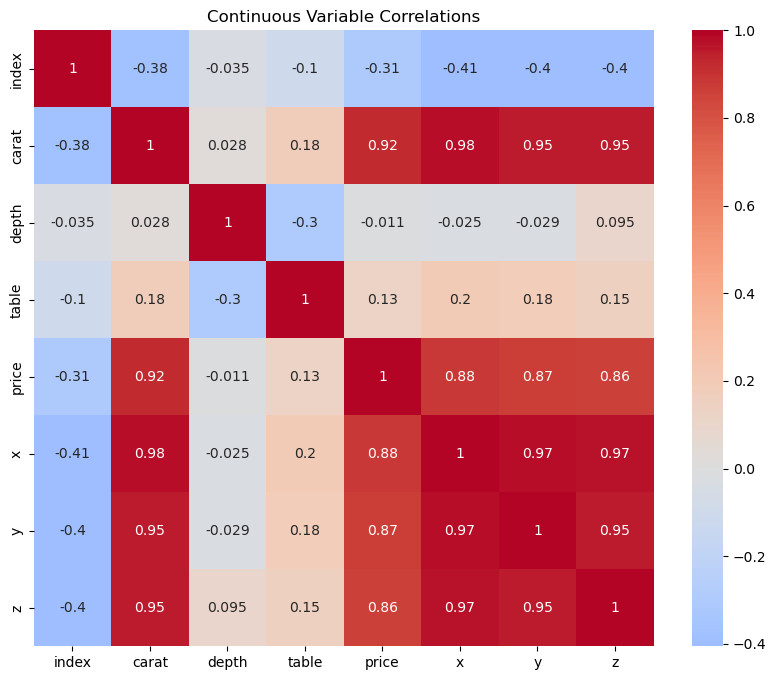

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[continuous_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Continuous Variable Correlations")
plt.show()

In [2]:
df['price']

NameError: name 'df' is not defined

<h1>Analysis</h1>

<>h2>Analysis Goals</h2>
1. Predicting price based on other features. Elastic Linear Reg, KNN, SVM, Neural Net. 
1.1 Are low correlation features worse predictors of price. 
2. Predicting if diamond will have better than average price. Decision Trees Elastic Log Reg, KNN, SVM, Neural Net 

